In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from scipy.integrate import quad
import scipy.stats as stats

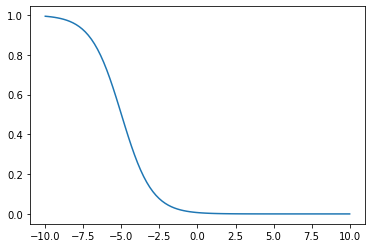

In [11]:
x = np.linspace(-10,10,100)
plt.plot(x,stats.logistic.sf(x, ))

# Parte I

In [13]:
# Definición de variables

k = 8.617333262e-5 # eV / K
h = 4.135667e-15 # eV*s
h_bar = h/(2*np.pi) # eV*s
m = 0.5*9.1e-31
q = 1.602176e-19

Ec = -4.7
Ef = -5

L = 40e-9
W = 3*L

C_g = 0.1e-15



In [14]:
def fermi_dirac(E,U,T):
    return 1/(1+np.exp((E-U)/(k*T)))

def fermi_integral(E, fermi, T):
    if E < fermi:
        return 1 / (1 + np.exp((E - fermi) / (k * T)))
    else:
        return np.exp(-(E - fermi) / (k * T)) / (1 + np.exp(-(E - fermi) / (k * T)))

def get_N(E, U,Vds,T):
    return L/h*(2*m/(E-U-Ec))*(fermi_integral(E,Ef, T)+fermi_integral(E,Ef-q*Vds, T))

def get_U(N,N_0, V_gs):
    return q*q/C_g*(N-N_0)-q*V_gs

def get_I(E,U,Vds,T):
    return np.sqrt(2*m*(E-Ec-U))*(fermi_integral(E,Ef,T)-fermi_integral(E,Ef-q*Vds, T))

def solve_I(Vds,T,V_gs, tol = 1e-25,lr = 1e-3):
    
    N_0 = quad(get_N, Ec, np.inf, args=(0,0,T))[0] # Pendiente
    print(N_0)
    U_ = 0
    
    for _ in tqdm(range(int(1e5)), disable=True):
        N = quad(get_N, Ec, np.inf, args=(U_,Vds,T))[0]
        U = get_U(N,N_0,V_gs)

        if abs(U-U_) < tol:
            print('a')
            break

        else:
            U_ = U_ +lr*(U-U_)
    print(U) 
    
    I = q*W/(h*h/4)*quad(get_I,(Ec+U), np.inf, args = (U, Vds, T))[0]

    return U, I
    
ns = solve_I(0.5, 
            1, 
            0.3, )
ns
# plt.plot([solve_I(vds, 1, 0.3) for vds in np.linspace(0.0, 0.5, 100)])



0.0
a
-4.806528e-20


(-4.806528e-20, 0.0)

In [22]:
# plt.plot(ns)
ns


0.0